# Name:Mohamed Elsayed Elsayed
# ID:20191615024


  

# code for slove section problem with the same random numbers

In [1]:
import pandas as pd
rn_int=[0,94,73,70,82,25,35,61,42,48,26,88,31,90,55,95,58,70,15,73,65,74,75,98,72,59,85,98,21]
iat=[]
for i in rn_int:
    if i>0 and i<=24:
        iat.append(1)
    elif i>=25 and i<=64:
        iat.append(2)
    elif i>=65 and i<=84:
        iat.append(3)
    elif i>=85 and i<=99:
        iat.append(4)
    else:
        iat.append(0)

clock =[]
clock.append(0)
for i in range(1,len(iat)):
    clock.append(clock[i-1]+iat[i])
def abel_stfun(st):
    if st>=0 and st<=29:
        return 2
    elif st>=30 and st<=57:
        return 3
    elif st>=58 and st<=82:
        return 4
    elif st>=83 and st<=99:
        return 5

def baker_stfun(st):
    if st>=0 and st<=34:
        return 2
    elif st>=35 and st<=59:
        return 3 
    elif st>=60 and st<=79:
        return 4
    elif st>=80 and st<=99:
        return 5

    
rn_st=[32,96,89,32,67,48,63,99,98,66,85,58,6,39,15,2,48,63,85,61,40,16,18,52,71,16,34,96,90]
abel_start=[0 for i in range(29)]
abel_end=[0 for  i in range(29)]
abel_st=[0 for i in range(29)]
q_witinig=[0 for i in range(29)]
time_inSystem=[0 for i in range(29)]
i_abel=0
abel_idle=[0 for i in range(29)]
baker_idle=[0 for  i in range(29)]
baker_start=[0 for i in range(29)]
baker_end=[0 for i in range(29)]
baker_st=[0 for i in range(29)]
i_baker=0
for i in range(0,29):
    if clock[i]>60:
        timeEnd=i
        break
    if clock[i]>=baker_end[i_baker]:
        
        baker_start[i]=clock[i]
        baker_idle[i]= baker_start[i]-baker_end[i_baker]
        st=rn_st[i]
        baker_st[i]=baker_stfun(st)
        time_inSystem[i]=baker_st[i]
        baker_end[i]=baker_start[i]+baker_st[i]
        i_baker=i
        continue
    elif clock[i]>abel_end[i_abel]:
        abel_start[i]=clock[i]
        abel_idle[i]=abel_start[i]-abel_end[i_abel]
        st=(rn_st[i])
        abel_st[i]=abel_stfun(st)
        time_inSystem[i]=abel_st[i]
        abel_end[i]=abel_start[i]+abel_st[i]
        i_abel=i
        continue

    elif (baker_end[i_baker])<=(abel_end[i_abel]):
        q_witinig[i]=(baker_end[i_baker]-clock[i])
        baker_start[i]=baker_end[i_baker]
        baker_idle[i]= baker_start[i]-baker_end[i_baker]
        st=rn_st[i]
        baker_st[i]=baker_stfun(st)
        time_inSystem[i]=baker_st[i]+q_witinig[i]
        baker_end[i]=baker_start[i]+baker_st[i]
        i_baker=i
        continue
    elif (abel_end[i_abel])<(baker_end[i_baker]):
        q_witinig[i]=(abel_end[i_abel]-clock[i])
        abel_start[i]=abel_end[i_abel]
        abel_idle[i]= abel_start[i]-abel_end[i_abel]
        st=(rn_st[i])
        abel_st[i]=abel_stfun(st)
        time_inSystem[i]=abel_st[i]+q_witinig[i]
        abel_end[i]=abel_start[i]+abel_st[i]
        i_abel=i
        continue
    
df={"Random IAT ":rn_int,"IAT":iat,"Clock":clock,"RN ST":rn_st,"Abel start":abel_start,"Abel st":abel_st,"Abel end":abel_end,"Baker start":baker_start,"Baker st":baker_st,"Baker end":baker_end,"Queuing Time":q_witinig,"Time in system":time_inSystem,"abel idel":abel_idle,"Bake ridel":baker_idle}
        
df=pd.DataFrame(df)


In [2]:
df.iloc[0:timeEnd,:]

,Random IAT,IAT,Clock,RN ST,Abel start,Abel st,Abel end,Baker start,Baker st,Baker end,Queuing Time,Time in system,abel idel,Bake ridel
0,0,0,0,32,0,0,0,0,2,2,0,2,0,0
1,94,4,4,96,0,0,0,4,5,9,0,5,0,2
2,73,3,7,89,7,5,12,0,0,0,0,5,7,0
3,70,3,10,32,0,0,0,10,2,12,0,2,0,1
4,82,3,13,67,0,0,0,13,4,17,0,4,0,1
5,25,2,15,48,15,3,18,0,0,0,0,3,3,0
6,35,2,17,63,0,0,0,17,4,21,0,4,0,0
7,61,2,19,99,19,5,24,0,0,0,0,5,1,0
8,42,2,21,98,0,0,0,21,5,26,0,5,0,0
9,48,2,23,66,24,4,28,0,0,0,1,5,0,0


In [3]:

if abel_start[timeEnd-1]>baker_start[timeEnd-1]:
    ServerEnd=abel_start[timeEnd-1]
else:
    ServerEnd=baker_start[timeEnd-1]
print("precentage abel's busy",sum(abel_st)/ServerEnd*100)
print("precentage baker's busy",sum(baker_st)/ServerEnd*100)
count=0
for i in range(0,timeEnd):
    if q_witinig[i]!=0:
        count=count+1
print("avg of watinig time",sum(q_witinig)/count)


precentage abel's busy 52.54237288135594
precentage baker's busy 83.05084745762711
avg of watinig time 1.0


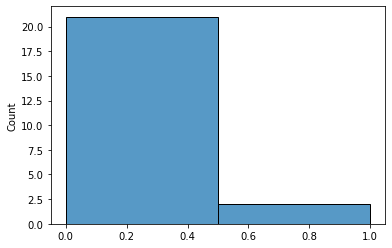

In [4]:
import seaborn as sns 

sns.histplot(data=df.iloc[0:timeEnd,:], x=q_witinig[0:timeEnd],bins=2)

# code allow to user to input random numbers for IAT and ST

In [ ]:


rn_int=[]
rn_st=[]

x=int(input("enter num of random numbers"))
y=int(input("enter when time will e stop"))

for i in range(0,x):
    rn_int.append(int(input("enter  rn IAT")))
    rn_st.append(int(input("enter  rn ST")))
import pandas as pd
iat=[]
for i in rn_int:
    if i>0 and i<=24:
        iat.append(1)
    elif i>=25 and i<=64:
        iat.append(2)
    elif i>=65 and i<=84:
        iat.append(3)
    elif i>=85 and i<=99:
        iat.append(4)
    else:
        iat.append(0)

clock =[]
clock.append(0)
for i in range(1,len(iat)):
    clock.append(clock[i-1]+iat[i])
def abel_stfun(st):
    if st>=0 and st<=29:
        return 2
    elif st>=30 and st<=57:
        return 3
    elif st>=58 and st<=82:
        return 4
    elif st>=83 and st<=99:
        return 5

def baker_stfun(st):
    if st>=0 and st<=34:
        return 2
    elif st>=35 and st<=59:
        return 3 
    elif st>=60 and st<=79:
        return 4
    elif st>=80 and st<=99:
        return 5

    
abel_start=[0 for i in range(x)]
abel_end=[0 for  i in range(x)]
abel_st=[0 for i in range(x)]
q_witinig=[0 for i in range(x)]
time_inSystem=[0 for i in range(x)]
i_abel=0
abel_idle=[0 for i in range(x)]
baker_idle=[0 for  i in range(x)]
baker_start=[0 for i in range(x)]
baker_end=[0 for i in range(x)]
baker_st=[0 for i in range(x)]
i_baker=0
for i in range(0,x):
    if clock[i]>y:
        timeEnd=i
        break
    if clock[i]>=baker_end[i_baker]:
        
        baker_start[i]=clock[i]
        baker_idle[i]= baker_start[i]-baker_end[i_baker]
        st=rn_st[i]
        baker_st[i]=baker_stfun(st)
        time_inSystem[i]=baker_st[i]
        baker_end[i]=baker_start[i]+baker_st[i]
        i_baker=i
        continue
    elif clock[i]>abel_end[i_abel]:
        abel_start[i]=clock[i]
        abel_idle[i]=abel_start[i]-abel_end[i_abel]
        st=(rn_st[i])
        abel_st[i]=abel_stfun(st)
        time_inSystem[i]=abel_st[i]
        abel_end[i]=abel_start[i]+abel_st[i]
        i_abel=i
        continue

    elif (baker_end[i_baker])<=(abel_end[i_abel]):
        q_witinig[i]=(baker_end[i_baker]-clock[i])
        baker_start[i]=baker_end[i_baker]
        baker_idle[i]= baker_start[i]-baker_end[i_baker]
        st=rn_st[i]
        baker_st[i]=baker_stfun(st)
        time_inSystem[i]=baker_st[i]+q_witinig[i]
        baker_end[i]=baker_start[i]+baker_st[i]
        i_baker=i
        continue
    elif (abel_end[i_abel])<(baker_end[i_baker]):
        q_witinig[i]=(abel_end[i_abel]-clock[i])
        abel_start[i]=abel_end[i_abel]
        abel_idle[i]= abel_start[i]-abel_end[i_abel]
        st=(rn_st[i])
        abel_st[i]=abel_stfun(st)
        time_inSystem[i]=abel_st[i]+q_witinig[i]
        abel_end[i]=abel_start[i]+abel_st[i]
        i_abel=i
        continue
    
df={"Random IAT ":rn_int,"IAT":iat,"Clock":clock,"RN ST":rn_st,"Abel start":abel_start,"Abel st":abel_st,"Abel end":abel_end,"Baker start":baker_start,"Baker st":baker_st,"Baker end":baker_end,"Queuing Time":q_witinig,"Time in system":time_inSystem,"abel idel":abel_idle,"Bake ridel":baker_idle}
        
df=pd.DataFrame(df)
